# Libraries

In [1]:
import random
import sys
import copy
import sys 
import math
import statsmodels.api as sm
import numpy as np 
import pandas as pd
import itertools
import os
import time
import warnings
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
from numpy.random import multinomial
from statsmodels.distributions.mixture_rvs import mixture_rvs
from random import randrange
from statistics import mean
from statistics import median
from math import sqrt
from math import pow
from math import log2

warnings.simplefilter(action='ignore', category=FutureWarning)
mpl.rc('figure', max_open_warning = 0)

In [2]:
start  = datetime.now()
start_string = str(start.strftime("%d-%m-%Y_%H_%M"))

In [3]:
folder_name = "KDE_Profile"+ start_string
file_extension = ".txt"
file_name =  "KDE_Profile"+ start_string + file_extension
os.mkdir(folder_name)
os.chdir(folder_name)

In [4]:
prob_trash = 0.000000001
prob_fill = 0.00000001

# Data loading and processing

In [5]:
data1 = pd.read_csv(r"C:\Users\n10387684\OneDrive - Queensland University of Technology\1_QUT\Codes\GitHub\TTR_AS\Data_Finucane road\TT_all_day_morning.csv")

In [6]:
dddd = data1.drop(data1.iloc[:, 0:2], axis=1)
dddd = dddd.T
dddd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1/01/2020,WEDNESDAY,3.93,3.93,3.94,3.98,3.95,4.04,4.05,4.12,4.16,4.24,4.27,4.29
2,2/01/2020,THURSDAY,4.25,4.4,4.56,4.74,4.65,4.72,4.89,5.14,5.02,5.02,5.37,5.6
3,3/01/2020,FRIDAY,4.27,4.37,4.59,4.62,4.78,4.84,4.97,5.17,5.31,5.03,5.59,5.5
4,4/01/2020,SATURDAY,4.11,3.96,4.13,4.04,4.16,4.22,4.36,4.37,4.59,4.68,4.69,4.83
5,5/01/2020,SUNDAY,3.83,3.85,3.87,4.04,3.94,4.06,4.08,4.17,4.27,4.37,4.34,4.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,27/12/2020,SUNDAY,3.95,4.07,4.07,4.03,4.18,4.18,4.3,4.26,4.46,4.67,4.73,4.95
363,28/12/2020,MONDAY,4.05,4.09,4.08,4.16,4.19,4.1,4.3,4.45,4.39,4.7,4.74,5.02
364,29/12/2020,TUESDAY,4.38,4.4,4.44,4.56,4.61,4.56,4.71,4.79,4.9,5.34,5.39,5.47
365,30/12/2020,WEDNESDAY,4.22,4.35,4.54,4.42,4.39,4.54,4.69,4.66,4.89,5.15,5.23,5.39


In [7]:
def data_process(data):

    data2 = pd.DataFrame(data) #Converting data to dataframe
    data3 = data2.drop([0, 1]) # Removing first two rows
    data4 = data3.drop(data3.iloc[:, 0:2], axis=1) # Dropping first three columns
    data5 = data4.T
    
    #convert dataframe to array
    data6 = data5.to_numpy(dtype=float)
    data7 = data6.copy()
    df = data7*60
    df = df[:,0:12] # all intervals

    print('Data loaded')
    
    return df

In [8]:
def kde_day():
    '''
    Info: 
        Kernel density estimation for each cluster
    
    Inputs: 
        1) start time (ti), 
        2) end time (tj) , 
        3) (n,k) Array where samples of cluster i are at index i and, 
        shape of input array = (ni,K) where n is the number of samples in cluster i
    Outputs: 
        1) (K,n) Array of estimated kerner densities where K is the number of clusters
        2) (K,n) Array of grid points (interpolated samples) where K is the number of clusters
        output will have same number of samples for each cluster and,
        the number would depend on the grid size
    Iterator: 
        i will iterate over clusters (i in range of 0 to n-k)
    '''
    density = []
    support = []
    day = []
    
    df = data_process(data1)
    
    for i in range(len(df)):
        
        model = sm.nonparametric.KDEUnivariate(df[i])
        model.fit()

        a = model.density/np.sum(model.density) #Normalizing the estimated density

        density.append(a) #Probability values
        
        support.append(model.support) #Measured quantity i.e., TT in this case
        day.append(i)
   
    print('Day wise Kernel density estimated')
    
    return (density, support, day), df

In [9]:
SMALL_SIZE = 10
MEDIUM_SIZE = 27
BIGGER_SIZE = 32

In [10]:
def kde_example():
    
    pd.options.mode.chained_assignment = None  # default='warn' ignoring the warnings

    (density, support, day), df = kde_day()  ###### KDE execution for each day ###############################

    density_array=np.array(density)
    TT_array=np.array(support)
    day_array=np.array(day)
    
    days_plot = PdfPages('Days_plots.pdf')
    
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    plt.xlabel('Travel time in seconds')
    plt.ylabel('Probability density')
    
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize   
    
    a = 1
    for i in range(0,10): # 'i' is to iterate over range of days len(density_array) (0,30)
        
        day_i=pd.DataFrame()
        day_i['TT'] = TT_array[i]
        day_i["probabilityi"] =(density_array[i])
        sum1= day_i["probabilityi"].sum()
        day_i["probabilityi"]= day_i["probabilityi"].div(sum1)
        day_i = day_i.round({'TT':0})
        min_valuei = day_i['TT'].min()
        max_valuei = day_i['TT'].max()
        
        y = np.cumsum(day_i["probabilityi"]) 

        x,y = zip(*sorted(zip(day_i['TT'],y),key=lambda x: x[0]))

        ax.plot(x, y, lw=3, zorder=10,label='Day %s' %a)
        
        plt.legend()
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        
        days_plot.savefig(fig)
        
        a = a+1

    days_plot.close()
    
    print('Distance matrix caclulated')

    return (density, support, day), df

In [11]:
(density, support, day), df = kde_day()

Data loaded
Day wise Kernel density estimated


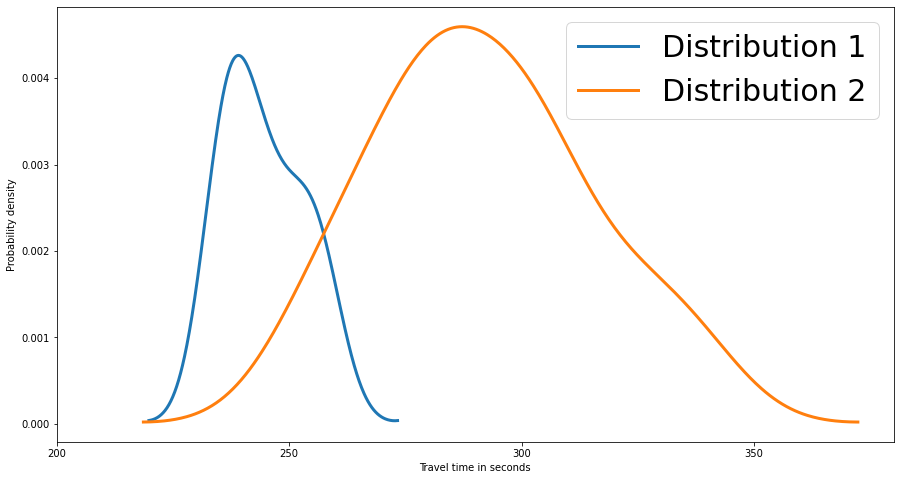

In [12]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.xlabel('Travel time in seconds')
plt.ylabel('Probability density')

plt.rc('axes', titlesize=40)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize   

y = density[0]
x = support[0]

y_1 = density[1]
x_1 = support[1]

ax.plot(x, y, lw=3, zorder=20, label='Distribution 1')
ax.plot(x_1, y_1, lw=3, zorder=20, label='Distribution 2')

plt.xticks(np.arange(200, 400, 50))
plt.yticks(np.arange(0, 0.005, 0.001))

plt.legend()
ax.legend(bbox_to_anchor=(1, 1))

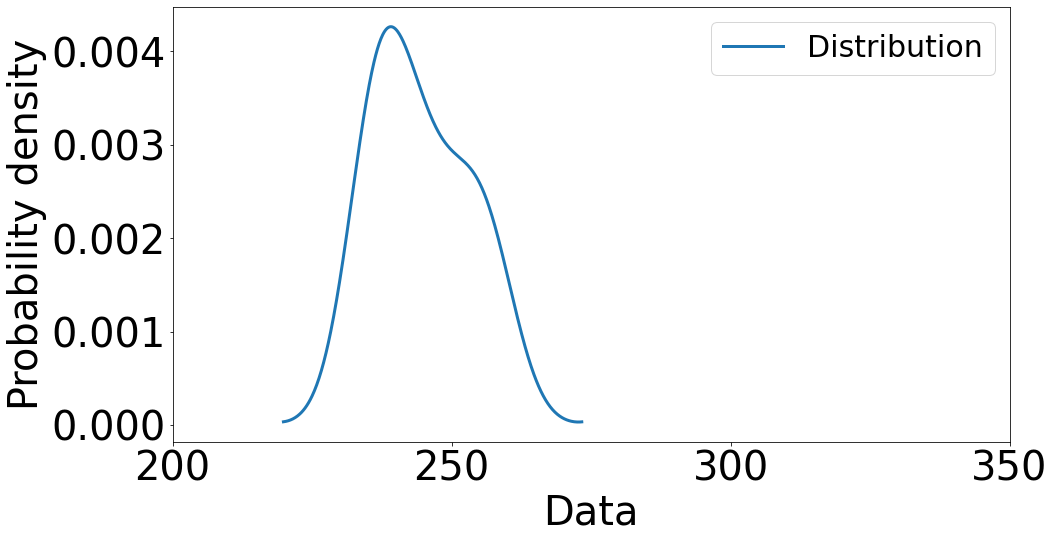

In [13]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.xlabel('Data')
plt.ylabel('Probability density')

plt.rc('axes', titlesize=40)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize   

y = density[0]
x = support[0]

y_1 = density[1]
x_1 = support[1]

ax.plot(x, y, lw=3, zorder=20, label='Distribution')

plt.xticks(np.arange(200, 400, 50))
plt.yticks(np.arange(0, 0.005, 0.001))

plt.legend()
ax.legend(bbox_to_anchor=(1, 1))

In [14]:
density_array=np.array(density)
TT_array=np.array(support)
day_array=np.array(day)

day_i=pd.DataFrame()
day_j=pd.DataFrame()

day_i['TT'] = TT_array[0]
day_i["probabilityi"] =(density_array[0])
sum1= day_i["probabilityi"].sum()
day_i["probabilityi"]= day_i["probabilityi"].div(sum1)
day_i = day_i.round({'TT':0})

day_j['TT'] = TT_array[1]
day_j["probabilityj"] =(density_array[1])
sum2= day_j["probabilityj"].sum()
day_j["probabilityj"]= day_j["probabilityj"].div(sum2)
day_j = day_j.round({'TT':0})

min_valuei = day_i['TT'].min()
max_valuei = day_i['TT'].max()
min_valuej = day_j['TT'].min()
max_valuej = day_j['TT'].max()

df_ij = pd.merge(day_i, day_j,  how='outer', on=['TT'])
df_ij['probabilityi'] = df_ij['probabilityi'].fillna(0.00000001)
df_ij['probabilityj'] = df_ij['probabilityj'].fillna(0.00000001)

df_ij = df_ij.sort_values(by=['TT'])
df_ij = df_ij.reset_index(drop=True)

In [15]:
df_ij

,TT,probabilityi,probabilityj
0,219.0,1.000000e-08,0.000019
1,219.0,1.000000e-08,0.000019
2,219.0,1.000000e-08,0.000019
3,220.0,3.651659e-05,0.000020
4,220.0,4.362099e-05,0.000021
...,...,...,...
2033,371.0,1.000000e-08,0.000021
2034,371.0,1.000000e-08,0.000019
2035,372.0,1.000000e-08,0.000019
2036,372.0,1.000000e-08,0.000019


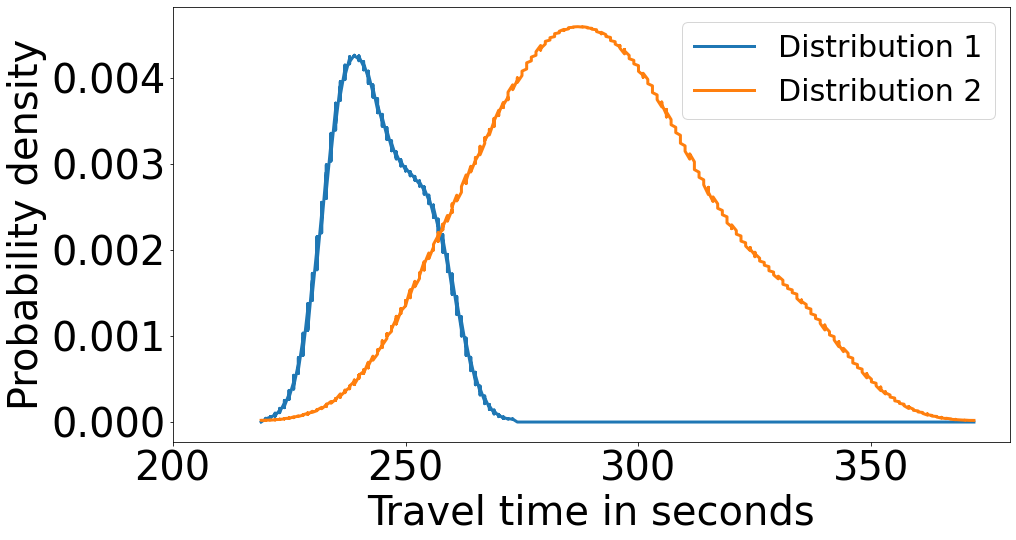

In [16]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.xlabel('Travel time in seconds')
plt.ylabel('Probability density')

plt.rc('axes', titlesize=40)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize   

y = df_ij['probabilityi']
x = df_ij['TT']

y_1 = df_ij['probabilityj']
x_1 = df_ij['TT']

ax.plot(x, y, lw=3, zorder=20, label='Distribution 1')
ax.plot(x_1, y_1, lw=3, zorder=20, label='Distribution 2')

plt.xticks(np.arange(200, 400, 50))
plt.yticks(np.arange(0, 0.005, 0.001))

plt.legend()
ax.legend(bbox_to_anchor=(1, 1))

Data loaded
Day wise Kernel density estimated
Distance matrix caclulated


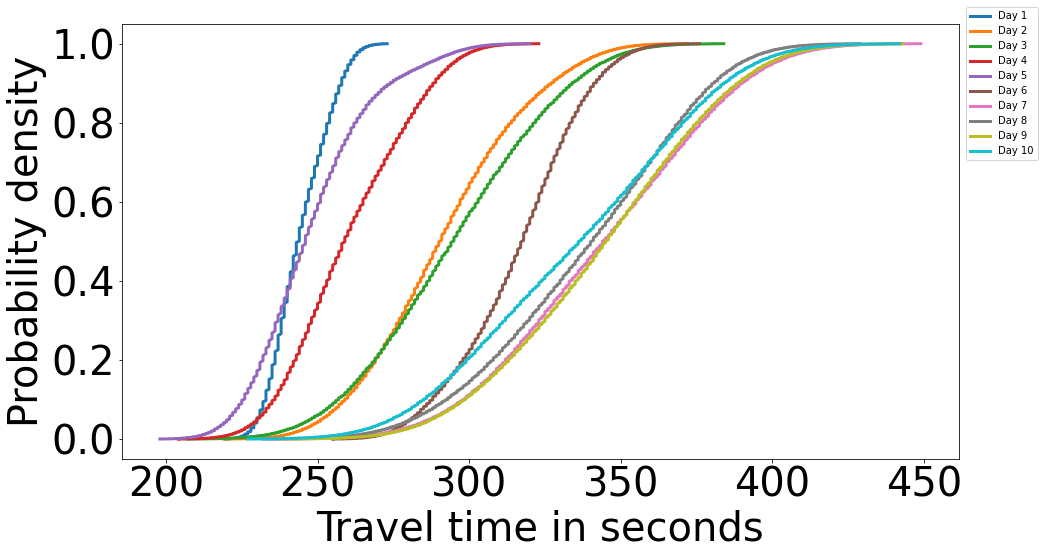

In [17]:
(density, support, day), df = kde_example()

In [20]:
data2 = pd.read_excel(r"C:\Users\n10387684\OneDrive - Queensland University of Technology\1_QUT\Codes\GitHub\TTR_AS\Data_Finucane road\fortsprofile.xlsx")
data2 = data2.set_index('TI')
data2 = data2*60
data2

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
TI,,,,,,,,,,
06:00 - 06:15,235.8,255.0,256.2,246.6,229.8,288.0,292.8,288.6,296.4,290.4
06:15 - 06:30,235.8,264.0,262.2,237.6,231.0,285.0,313.8,297.6,307.2,298.2
06:30 - 06:45,236.4,273.6,275.4,247.8,232.2,304.2,325.2,326.4,316.2,296.4
06:45 - 07:00,238.8,284.4,277.2,242.4,242.4,310.2,325.2,318.6,322.8,306.6
07:00 - 07:15,237.0,279.0,286.8,249.6,236.4,321.0,318.0,322.8,336.0,321.6
07:15 - 07:30,242.4,283.2,290.4,253.2,243.6,318.0,331.2,325.8,346.8,325.2
07:30 - 07:45,243.0,293.4,298.2,261.6,244.8,324.6,361.8,373.2,346.2,353.4
07:45 - 08:00,247.2,308.4,310.2,262.2,250.2,336.6,360.6,351.6,385.2,355.2
08:00 - 08:15,249.6,301.2,318.6,275.4,256.2,345.6,361.2,370.8,362.4,363.6


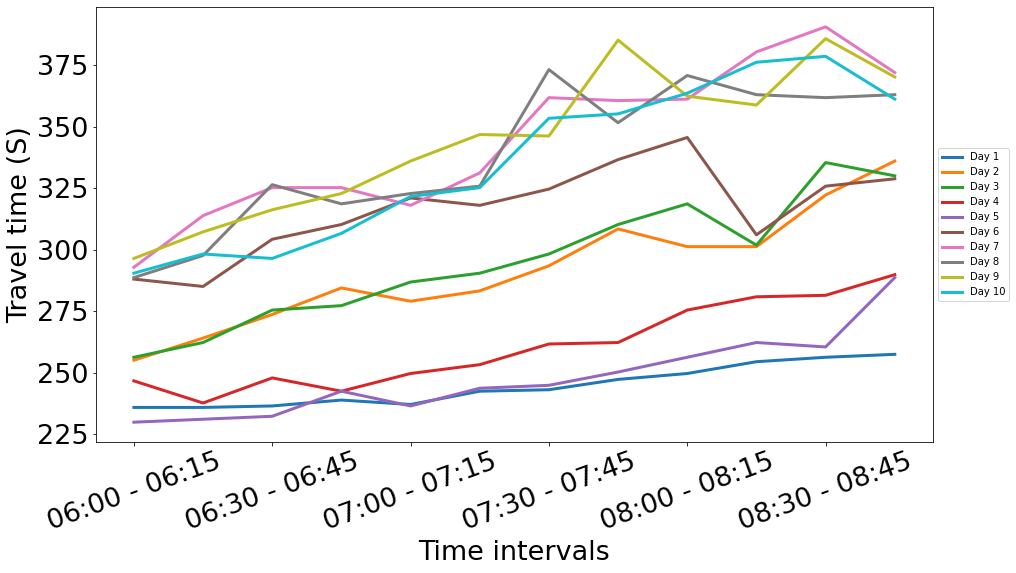

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))

xticklabels = ['6:00-6:15', '6:15-6:30', '6:30-6:45', '6:45-7:00', '7:00-7:15', '7:15-7:30','7:30-7:45', 
              '7:45-8:00', '8:00-8:15', '8:15-8:30','8:30-8:45','8:45-9:00']

data2.plot(ax=ax,lw=3, zorder=10)
plt.xticks(rotation=20)

plt.xlabel('Time intervals')
plt.ylabel('Travel time (S)')

plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.patch.set_facecolor('w')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')

plt.show()